# Import all the necessary libraries

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits)

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


# Preprocess the data

In [56]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the model

In [57]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model

In [58]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
history

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2372 - accuracy: 0.9277 - val_loss: 0.0563 - val_accuracy: 0.9828
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0872 - accuracy: 0.9744 - val_loss: 0.0487 - val_accuracy: 0.9849
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0642 - accuracy: 0.9816 - val_loss: 0.0408 - val_accuracy: 0.9896
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0502 - accuracy: 0.9844 - val_loss: 0.0344 - val_accuracy: 0.9905
Epoch 5/5
 843/1500 [===============>..............] - ETA: 2s - loss: 0.0424 - accuracy: 0.9871

# Evaluate on test data

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Plot training & validation accuracy and validation loss

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predictions

In [ ]:
predictions = model.predict(x_test)

predicted_classes = predictions.argmax(axis=1)

print("First 5 Predictions:", predicted_classes[:5])

In [ ]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title("Predicted Label: {}".format(predicted_classes[0]))
plt.show()

In [ ]:

import numpy as np
import pandas as pd

# ML library
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from tensorflow.keras.datasets import mnist


In [16]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine train and test for dataframe creation (optional)
X_total = np.concatenate((x_train, x_test), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

# Create pandas dataframe for EDA (each row flattened)
X_df = pd.DataFrame(X_total.reshape(X_total.shape[0], -1))
y_df = pd.DataFrame(y_total, columns=['label'])

print("Dataframe shape:", X_df.shape)
print("Labels dataframe shape:", y_df.shape)


Dataframe shape: (70000, 784)
Labels dataframe shape: (70000, 1)


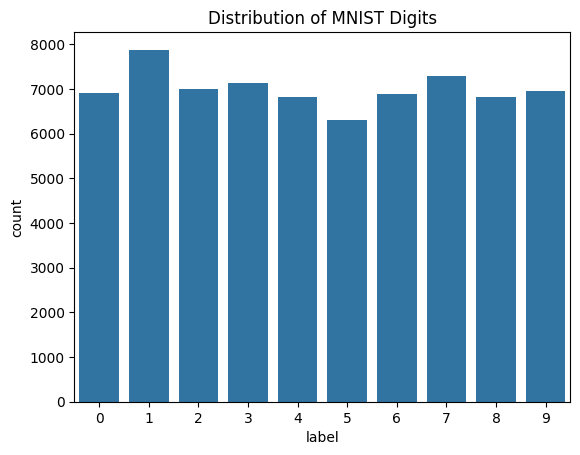

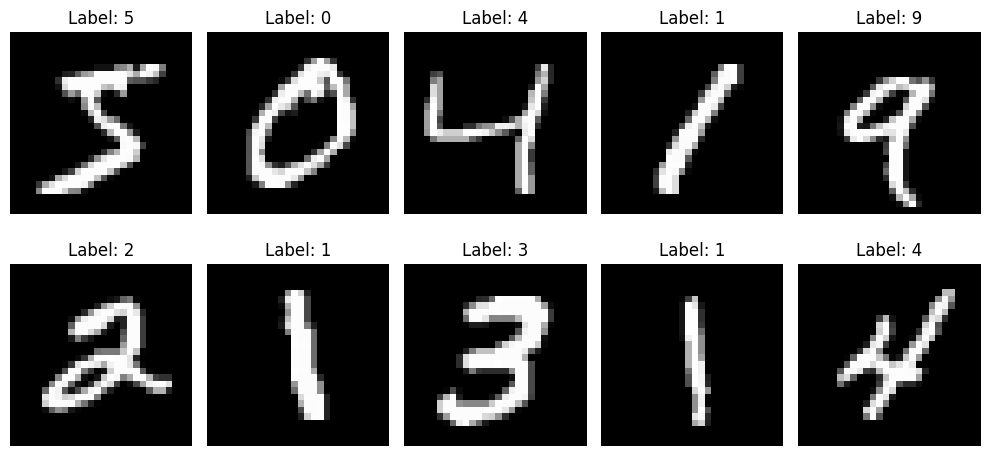

In [17]:
# Plot distribution of labels
sns.countplot(x=y_df['label'])
plt.title("Distribution of MNIST Digits")
plt.show()

# Show some sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_total[i], cmap='gray')
    plt.title("Label: {}".format(y_total[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()


In [18]:
# Reshape data to add channel dimension (28,28,1)
X_total = X_total.reshape(X_total.shape[0], 28, 28, 1)

# Normalize pixel values
X_total = X_total / 255.0

# One-hot encode labels
y_total_cat = tf.keras.utils.to_categorical(y_total, num_classes=10)

# Split into train and test using sklearn (80%-20%)
X_train, X_test, y_train_cat, y_test_cat = train_test_split(
    X_total, y_total_cat, test_size=0.2, random_state=42)


In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
